# 2 アルゴリズムと計算量

## イントロダクション

### 概要


アルゴリズムの性能を調べられるようになりたい。御利益の例：一つの問題を解くのに複数のアルゴリズムがあるときに，良いものを選べるようになる。

1.  例：$1+2+\dots+n$
2.  $O(n)$？
3.  現実？
    1.  CPython
    2.  PyPy（約2倍）
    3.  C++（約10倍）
        1.  **（罠あり）** AIで翻訳
        2.  **（注意点あり）** Clang
    4.  実験と本番
4.  RAMモデル

### 問題


正の整数 $n$ が入力されたら，$1+\dots+n$ の結果を出力するプログラムを作る。「$n(n+1)/2$ では？」という疑問には後で答える。この問題は，オンラインジャッジではなく，自分で目で見てジャッジする。

入力例を作る。

In [1]:
%%writefile input.dat
1
4
10
100

Writing input.dat


期待される出力は次のとおり。

    1
    10
    55
    5050

コードを書いて試してみる。

In [4]:
%%writefile sum.py
# 本体
def f(n):
  s = 0
  for i in range(n+1): #pythonでは、「n」とするとn未満という意味になるため「n+1」とする。
    s += i
  return s

# データの入力（第1回の資料を参照）
import sys
A = map(int, sys.stdin.read().split())

# 出力
for n in A:
  print(f(n))

Overwriting sum.py


実行する。

In [5]:
!python3 sum.py < input.dat

1
10
55
5050


> つねづね学生たちに言うのだが，演習というものは，あたえられた問題が解けたところから始まるのである。これが言い過ぎなら，問題が解けたところで道は半分。残りの半分こそ重要，と言い直してもよい。　江沢洋・中村孔一・山本義隆『演習詳解力学』（筑摩書房, 第2版, 2022）

<img src="https://ndlsearch.ndl.go.jp/thumbnail/9784480511188.jpg" width="100"/>

### アルゴリズム解析


アルゴリズムの性能を次の二つの観点で調べる。

-   時間計算量
-   空間計算量

この講義では主に時間計算量を扱う。時間計算量の意味で「計算量」ということもある。

`f(n)`の処理における計算の回数は次のとおり。

| 行  | 命令                 | コスト | 回数 |
|-----|----------------------|--------|------|
| 1   | `s = 0`              | $c_1$  | $1$  |
| 2   | `for i in range(n):` | $c_2$  | $n$  |
| 3   | `s += i`             | $c_3$  | $n$  |
| 4   | `return s`           | $c_4$  | $1$  |

それぞれの実行時間を $c_1,\dots, c_4$ とすると，全体の実行時間は$$c_1 + c_2n + c_3n + c_4=(c_2+c_3)n+(c_1+c_4)$$である。$n$ が大きくなると，$n$ に比例する項が最も大きくなるから，実行時間は $n$ に比例すると言える。その傾向を $\Theta(n)$ と表す。（曖昧に）$O(n)$ と表すこともある。

$n$ が大きくなったときの振る舞いを表す漸近記法には，$O, \Theta, \Omega, o, \omega$ がある。これらは計算量を表すのに使える漸近記法であって，計算量だけのための記法ではない。大ざっぱな意味を表にまとめる（[CLRSの図3.1](https://archive.org/details/thomas-h.-cormen-charles-e.-leiserson-ronald-l.-rivest-clifford-stein-introducti/page/54/mode/1up)や[Skienaの図2.3](https://archive.org/details/2008-book-the-algorithm-design-manual/page/36/mode/1up)も参照）。

| 漸近記法    | 意味                |
|-------------|---------------------|
| $O(n)$      | 増え方は $n$ 以下   |
| $\Theta(n)$ | 増え方は $n$ と同じ |
| $\Omega(n)$ | 増え方は $n$ 以上   |
| $o(n)$      | 増え方は $n$ 未満   |
| $\omega(n)$ | 増え方は $n$ 超過   |

$O$ は，$n$ が大きくなったときの計算量の増加の仕方を表すのに便利な記号である。例えば，$n$ が比較的小さいときは，$10n+100\in O(n)$ は $n^2\in O(n^2)$ より大きいが，1次式と2次式では，最終的には2次式のほうが大きくなる。

In [ ]:
from sympy import *
from sympy.plotting import plot

var('n')
plot(10 * n + 100, n**2, (n, 0, 20), legend=True);

**練習** 教科書p.45の関数を可視化し，順番を記憶する。

In [ ]:
var('n')
plot(log(n), sqrt(n), n, n * log(n), n**2, 2**n, factorial(n), (n, 1, 4), legend=True);

♠正確な定義：$O(g(n))$ は，正の定数 $c, n_0$ が存在して，全ての $n>n_0$ に対して $0\le f(n)\le cg(n)$ であるような関数 $f(n)$ の集合である。

♠論理式で書けば次のとおり。
$$O(g(n))=\left\{f(n)\mid\exists c>0, n_0>0\;\left(\forall n>n_0\;\left(0\le f(n)\le cg(n)\right)\right)\right\}$$

#### $O$ について


-   $n$ によらないものは $O(1)$。
-   定数倍は無視できる。$O(2n) = O(n)$
-   対数の底は無視できる（定数倍だから）。$O(\log_2 n)=O(\log n)=O(\ln n)$
-   「最も大きい」項だけを取り出してよい。$O(n^2 + 10000n) = O(n^2)$。あえて $n^2+10000n\in O(n^3)$ と表す必要はないが，間違いではない。
-   対象が不明だと議論が曖昧になる。$O(n+a)=O(n)$ で $O(n+m)\neq O(n)$？
-   $f(n) \in O(g(n))$ の意味で $f(n) = O(g(n))$と表すこともある。$O(g(n))=f(n)$ と表すことはない。
-   $2n^2+O(n)$ は，$2n^2$ に $O(n)$ の要素（例：$n+1$）が加えられたものを表す。例：$\sin x=x-\dfrac{x^3}{6}+\dfrac{x^5}{123}+O(x^6)$。
-   計算量が具体的なアルゴリズムの実行時間を表すとは限らない。$\Theta(n^2)$ のアルゴリズムの実装が，$\Theta(n)$ のアルゴリズムの実装より速いこともある。

**練習** 正しいものを選べ。

1.  $2n^2+1=O(n^2)$ 正解
2.  $\sqrt n=O(\log n)$　不正解
3.  $\log n=O(\sqrt n)$　正解
4.  $n^2(1+\sqrt n)=O(n^2\log n)$　不正解
5.  $3n^2+\sqrt n=O(n^2)$　正解
6.  $\sqrt n\log n=O(n)$　正解
7.  $\log n=O(n^{-1/2})$　不正解

### 実行時間の測定


`f(n)`の実行時間は次のように計れる。

``` python
start = time.perf_counter() # 開始時刻
f(n)
end = time.perf_counter()   # 終了時刻
end - start                 # 経過時間
```

後はAIに書かせてもよいだろう。

> f(n)を1からnの整数の和を求める関数とする。Pythonで，f(n)の実行時間が，nが増加するとどう変化するかを調べたい。n=h, 2h,…, 10h，ただしh=10^6/10の場合の実行時間を計って，結果を標準出力に出力するコードと，結果を読み込んでプロットするコードを書いて。numpyは使わずstatisticsを使って。fはsumを使わず，for文で書いて。

♠「numpyは使わずstatisticsを使って」は，後でPyPyを使うときに起こりうるトラブルを避ける知恵である。

生成されるコードを修正した例を示す。

In [6]:
%%writefile sum-bench.py
import time
import statistics

def f(n):
  s = 0
  for i in range(1, n + 1):
    s += i
  return s

def measure_execution_times():
  h = 10**6 // 10
  results = []

  for i in range(1, 11):
    n = i * h
    times = []
    for _ in range(5):  # 同じnで5回実行して平均を取る
      start = time.perf_counter()
      f(n)
      end = time.perf_counter()
      times.append(end - start)
    mean_time = statistics.mean(times)
    print(f"{n},{mean_time:.6f}")
    results.append((n, mean_time))

if __name__ == "__main__":
  measure_execution_times()

Writing sum-bench.py


実行すると，結果が画面に表示される。

In [7]:
!python3 sum-bench.py

100000,0.005054
200000,0.009415
300000,0.014501
400000,0.019379
500000,0.039648
600000,0.057341
700000,0.067615
800000,0.077639
900000,0.084568
1000000,0.094082


リダイレクトを使って，結果をファイルに保存する。

In [8]:
!python3 sum-bench.py > sum-bench.csv

ファイルを読み込んで可視化する。

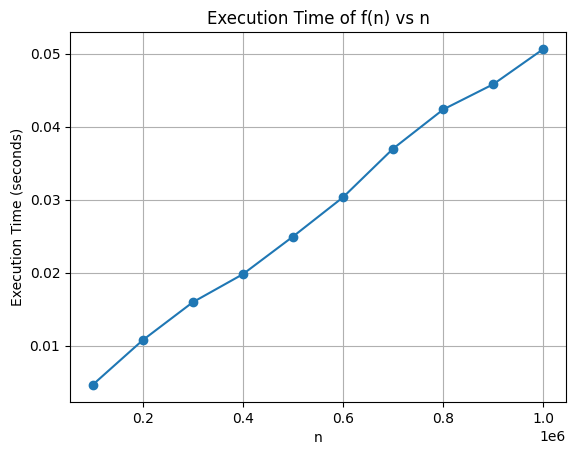

In [9]:
import matplotlib.pyplot as plt

def load_data(file_path):
  ns = []
  times = []
  with open(file_path, 'r') as f:
    for line in f:
      n_str, t_str = line.strip().split(',')
      ns.append(int(n_str))
      times.append(float(t_str))
  return ns, times

def plot(ns, times):
  plt.plot(ns, times, marker='o')
  plt.title("Execution Time of f(n) vs n")
  plt.xlabel("n")
  plt.ylabel("Execution Time (seconds)")
  plt.grid(True)
  plt.show()

def load_and_plot(file_path):
  ns, times = load_data(file_path)
  plot(ns, times)

load_and_plot("sum-bench.csv")

考察できることはあるか。

#### PyPyによる高速化


PyPyをインストールする。

In [10]:
!apt-get install -y pypy3 | tail -n 1

Processing triggers for man-db (2.10.2-1) ...


ベンチマークを実行し，結果を可視化する。

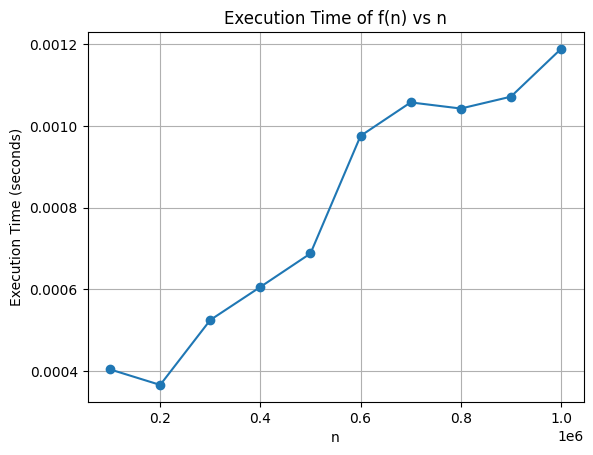

In [11]:
!pypy3 sum-bench.py > sum-bench2.csv

load_and_plot("sum-bench2.csv")

考察できることはあるか。

#### C++による高速化


> 次のコードをC++に翻訳して<br>
> （ここにPythonのコードを貼り付ける。）

生成されるコードを修正した例を示す。

In [12]:
%%writefile sum-bench.cpp
#include <iostream>
#include <vector>
#include <chrono>
#include <numeric>
#include <iomanip>

using namespace std;
using namespace chrono;

long long f(int n) {
  long long s = 0;
  for (int i = 1; i <= n; ++i) {
    s += i;
  }
  return s;
}

int main() {
  int h = 1000000 / 10;

  for (int i = 1; i <= 10; ++i) {
    int n = i * h;
    vector<double> times;

    for (int j = 0; j < 5; ++j) {
      auto start = high_resolution_clock::now();
      f(n);
      //cerr << f(n) << endl;
      auto end = high_resolution_clock::now();
      duration<double> elapsed = end - start;
      times.push_back(elapsed.count());
    }

    double sum = accumulate(times.begin(), times.end(), 0.0);
    double mean = sum / times.size();

    cout << n << "," << fixed << setprecision(6) << mean << endl;
  }

  return 0;
}

Writing sum-bench.cpp


このコードには罠があるのだが，まずは実行してみよう。

C++のコードは，実行前に**コンパイル**が必要である。コンパイルのためのプログラムを**コンパイラ**という。よく使われるコンパイラは次のとおり。

-   GNU C++ Compiler（オープンソース。GCCということもあるが，GCCはGNUのC言語のコンパイラを表すこともあることに注意。コマンドは`g++`）
-   <ruby>Clang<rp>（</rp><rt>クラン</rt><rp>）</rp> </ruby>（C language family frontend for LLVM。オープンソース。コマンドは`clang++`。♠macOSでは`g++`が`clang++`になる。）
-   Microsoft Visual C++（Windows限定）

##### GCC


GCCを試す。

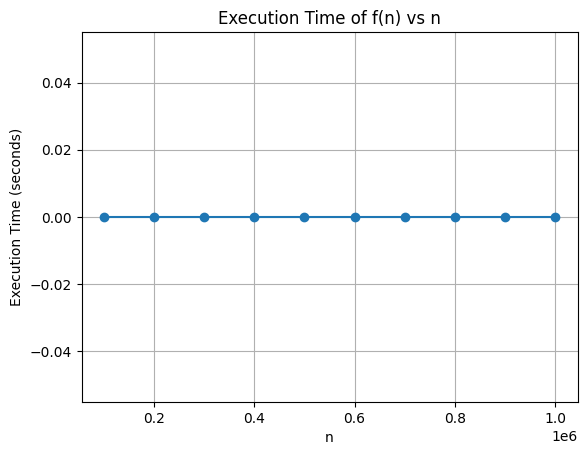

In [13]:
!g++ -O3 sum-bench.cpp -o sum-bench        # コンパイル
!./sum-bench > sum-bench3.csv 2> /dev/null # 実行

load_and_plot("sum-bench3.csv")

オプションの意味は次のとおり。

-   `-O3`：最適化レベル3
-   `-o sum-bench`：出力ファイル名
-   `2> /dev/null`：標準エラー出力を捨てる。

修正のヒント：`f(n)`の結果を標準エラー出力に出力してみる。

**劇的に速くはなるが，その効果は高々定数倍である。**

##### Clang


Clangを試す。

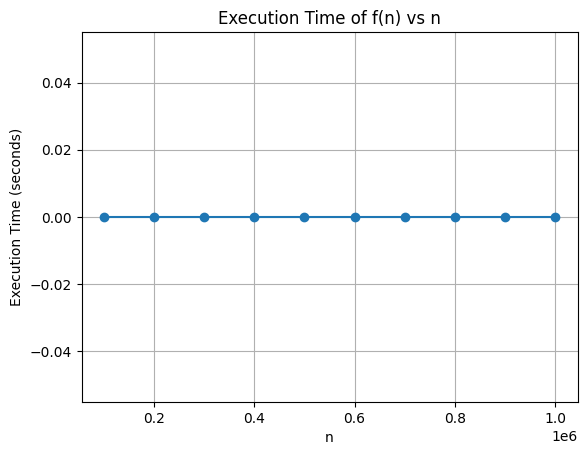

In [14]:
!clang++ -O3 -std=c++17 sum-bench.cpp -o sum-bench2 # コンパイル（C++17の機能を使う）
!./sum-bench2 > sum-bench4.csv 2> /dev/null         # 実行

load_and_plot("sum-bench4.csv")

考察のヒント：現実的なアルゴリズムの解析にはアセンブリコードが必要である。

手軽な方法 → [Compiler Explorer](https://godbolt.org/z/TvK1r7M71)

アセンブリコードが読めない場合は，次のようにAIを使えばよい。

> 各行にコメントを付けて解説して。<br>
> （ここにアセンブリコードを貼り付ける。）

（結果は割愛）

結局のところ，$n(n+1)/2$ を計算していることがわかる。

自分で試す場合：コンパイルしてアセンブリコードを生成する。

In [15]:
%%writefile sum.cpp
long long f(int n) {
  long long s = 0;
  for (int i = 1; i <= n; ++i) {
    s += i;
  }
  return s;
}

Writing sum.cpp


In [16]:
!clang++ -O3 -S sum.cpp # -Sでアセンブリコードを生成する。
!cat sum.s

	.text
	.file	"sum.cpp"
	.globl	_Z1fi                           # -- Begin function _Z1fi
	.p2align	4, 0x90
	.type	_Z1fi,@function
_Z1fi:                                  # @_Z1fi
	.cfi_startproc
# %bb.0:
                                        # kill: def $edi killed $edi def $rdi
	testl	%edi, %edi
	jle	.LBB0_1
# %bb.2:
	leal	-1(%rdi), %eax
	addl	$-2, %edi
	imulq	%rax, %rdi
	shrq	%rdi
	leaq	(%rdi,%rax,2), %rax
	addq	$1, %rax
	retq
.LBB0_1:
	xorl	%eax, %eax
	retq
.Lfunc_end0:
	.size	_Z1fi, .Lfunc_end0-_Z1fi
	.cfi_endproc
                                        # -- End function
	.ident	"Ubuntu clang version 14.0.0-1ubuntu1.1"
	.section	".note.GNU-stack","",@progbits
	.addrsig


♠いつもこういう最適化が行われるわけではない。参照：https://godbolt.org/z/acm19\_sum\_fail

参照：[最近のコンパイラの最適化技法](https://www.s2factory.co.jp/blog/compiler/)

##### ♠♠MMIX


実機での実行時間を正確に調べるためにはアセンブリコードを確認する必要があることがわかった。

そういうわけでTAOCPでは，MMIXという仮想的な計算機とそのアセンブリ言語MMIXALを用いた解析が行われる。この先の講義ではアセンブリコードの確認をすることはないのだが，参考までに，MMIXALのコードを確認する方法を紹介しておく。

参照：[MMIX Documentation, Sources, Binaries, Examples, Links, Projects, Proposals](https://mmix.cs.hm.edu/)

In [17]:
!wget https://mmix.cs.hm.edu/bin/optmmix-2011-5-6.tgz # コンパイラのダウンロード
!tar xzf optmmix-2011-5-6.tgz                         # 展開

--2025-04-16 03:22:25--  https://mmix.cs.hm.edu/bin/optmmix-2011-5-6.tgz
Resolving mmix.cs.hm.edu (mmix.cs.hm.edu)... 129.187.254.252, 2001:4ca0:0:103::81bb:fefc
Connecting to mmix.cs.hm.edu (mmix.cs.hm.edu)|129.187.254.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85621774 (82M) [application/x-gzip]
Saving to: ‘optmmix-2011-5-6.tgz’

optmmix-2011-5-6.tg 100%[===================>]  81.66M   428KB/s    in 3m 22s  

2025-04-16 03:25:48 (414 KB/s) - ‘optmmix-2011-5-6.tgz’ saved [85621774/85621774]



In [18]:
!/content/opt/mmix/bin/mmix-g++ -O3 -S sum.cpp # コンパイル
!cat sum.s

# 1 "sum.cpp"
! mmixal:= 8H LOC Data_Section
	.text ! mmixal:= 9H LOC 8B
	.p2align 2
	LOC @+(4-@)&3
	.global _Z1fi
_Z1fi	IS @
LFB:2	IS @
	SET $2,$0
	SLU $0,$0,32
	SR $0,$0,32
	BNP $0,L:9
	SETL $3,0
	SETL $1,#1
	SLU $2,$2,32
	SR $2,$2,32
L:5	IS @
	ADDU $3,$3,$1
	ADDU $1,$1,1
	SLU $0,$1,32
	SR $0,$0,32
	CMP $0,$2,$0
	PBNN $0,L:5
	SET $0,$3
	POP 1,0
L:9	IS @
	SETL $3,0
	SET $0,$3
	POP 1,0

LFE:2	IS @
	.data ! mmixal:= 8H LOC 9B


> 各行にコメントを付けて解説して。<br>
> （ここにアセンブリコードを貼り付ける。）

実行してみたい場合は，エミュレータを使う。

In [19]:
!wget https://mmix.cs.hm.edu/bin/mmix            # MMIXのエミュレータ
!chmod +x mmix                                   # 実行権限付与

--2025-04-16 03:26:01--  https://mmix.cs.hm.edu/bin/mmix
Resolving mmix.cs.hm.edu (mmix.cs.hm.edu)... 129.187.254.252, 2001:4ca0:0:103::81bb:fefc
Connecting to mmix.cs.hm.edu (mmix.cs.hm.edu)|129.187.254.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988450 (965K) [application/x-executable]
Saving to: ‘mmix’

mmix                100%[===================>] 965.28K   356KB/s    in 2.7s    

2025-04-16 03:26:05 (356 KB/s) - ‘mmix’ saved [988450/988450]



関数`main`を用意する。

In [20]:
%%writefile test.cpp
#include <iostream>

long long f(int n);

int main() {
  std::cout << f(10) << std::endl;
  return 0;
}

Writing test.cpp


コンパイルして実行する。

In [21]:
!/content/opt/mmix/bin/mmix-g++ test.cpp sum.cpp # コンパイル
!./mmix a.out                                    # 実行

55


### 計算量（反省）


$$1+2+\dots+n=\frac{n(n+1)}{2}$$

-   左辺を素直に計算する場合の計算量は $O(n)$？
-   右辺を計算する場合（加算・乗算・除算を各1回）の計算量は $O(1)$？

$n$ が大きい場合（$10^{10^1}, 10^{10^2}, \dots, 10^{10^7}$）の，右辺の実行時間を計る。（結果の1列目は $\log n$ つまり $10^1, 10^2, \dots, 10^7$ とする。）

In [22]:
%%writefile sum-bench2.py
import time
import statistics

def f(n):
  return n * (n + 1) // 2

def measure_execution_times():
  results = []

  for i in range(1, 8):
    n = 10**(10**i)
    times = []
    start = time.perf_counter()
    f(n)
    end = time.perf_counter()
    times.append(end - start)
    mean_time = statistics.mean(times)
    print(f"{10**i},{mean_time:.6f}")
    results.append((n, mean_time))

if __name__ == "__main__":
  measure_execution_times()

Writing sum-bench2.py


実行する。

In [23]:
!pypy3 sum-bench2.py > sum-bench5.csv

結果を両対数で可視化する。

In [ ]:
def plot(ns, times):
  plt.plot(ns, times, marker='o')
  plt.xscale('log')  # x軸を対数スケールに
  plt.yscale('log')  # y軸を対数スケールに
  plt.title("Execution Time of f(n) vs log n")
  plt.xlabel("log(log n)")
  plt.ylabel("Execution Time (seconds, log scale)")
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.show()

load_and_plot("sum-bench5.csv")

加算が $O(\log n)$，乗算が $O\left((\log n)^2\right)$，$2$ での除算が $O(\log n)$ だとすると，全体では $O\left((\log n)^2\right)$ となる（一般の除算は遅い）。♠実は，乗算はもっと早くできる。TAOCP 4.3.3項「乗算をどこまで速くできるか」を参照。

四則演算が $O(1)$ でないとすると，左辺の計算量も $O(n)$ とは言えなくなる。加算の計算量は**桁数**（$\log$）に比例するから，計算量はおおよそ $O(\log 1+\log 2+\dots+\log n)=O(\log n!)=O(n\log n)$ である。最後の等号で**スターリングの公式**（$n!\sim\sqrt{2\pi n}\left(n/e\right)^n$）を使った。$\log n!\sim n\log n$ を覚えておくとよい。$a_n\sim b_n$ は $\displaystyle\lim_{n\to\infty}\frac{a_n}{b_n}=1$ のこと。

左辺の計算量が $O(n\log n)$ で，右辺の計算量が $O\left((\log n)^2\right)$ だから，$n$ が大きいときもやはり，右辺で計算した方がよさそうである。

### RAMモデル


この講義ではRAMモデルを仮定する。そうすると，$1+\dots+n$ の計算量は $O(n)$ になる。

**RAMモデル**（Random Access Machineモデル）は，アルゴリズムの解析や計算量の評価に使われる理論的な計算モデルの一つ。特徴は次のとおり。

1.  **逐次実行**: 命令は1つずつ順番に実行される。
2.  **無限のメモリ**: メモリは無限に存在し，各セルには一意のアドレスがある。
3.  **単位時間操作**: 基本的な演算（加算，減算，乗算，除算，比較，メモリアクセスなど）の計算量は $O(1)$。
4.  **ランダムアクセス**: 任意のメモリセルに直接アクセスできる。

### まとめ


-   計算量を知りたい。
-   コードから見積もる？　時間を計る？　いずれにしても，無視される定数，ライブラリやコンパイラの影響が大きく，「ケースバイケース」になる。$n$ が比較的小さい場合とそうでない場合で，計算の性質がまったく異なることもある。
-   妥協の産物：RAMモデル

## 2.2 問題とアルゴリズムの例


教科書p.40の問題「Top 3」と似た問題を扱う。

問題：[山の高さ](https://onlinejudge.u-aizu.ac.jp/challenges/search/titles/0001)

**「降順に並べ替えて，先頭の3件を取り出す」** という方針（教科書p.40のAlgorithm 2）を試す。「並べ替え」がライブラリで簡単にできるという知識を活用するのである。

### 要素技術の確認


要素技術は次のとおり。

1.  データの入力
2.  （降順の）並べ替え
3.  3件の抽出
4.  データの最大値（最小値）

Google Colabで一つずつ試す。[AtCodeのコードテスト](https://atcoder.jp/contests/APG4bPython/custom_test)を使ってもよい。

#### データの入力


データの入力は，次のようなコードで行う。

In [ ]:
%%writefile algo2.py
import sys
A = list(map(int, sys.stdin.read().split()))
print(A) # 確認

データファイルを作る。

In [ ]:
%%writefile input1.dat
1819
2003
876
2840
1723
1673
3776
2848
1592
922

In [ ]:
%%writefile input2.dat
100
200
300
400
500
600
700
800
900
900

動作を確認する。

In [ ]:
!python3 algo2.py < input1.dat
!python3 algo2.py < input2.dat

#### 並べ替え

In [ ]:
A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
A.sort()
print(A)

#### 降順の並べ替え


`reverse=True`を指定すると，降順（descending）に並べ替える。指定しなければ昇順（ascending）である。

In [ ]:
A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
A.sort(reverse=True)
print(A)

#### 3件の抽出


リストから先頭の3件を取り出す。

In [ ]:
A = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
print(A[:3])

#### データの最大値（最小値）


このテクニックは，最初（Algorithm 2）では使わないが，後で（Algorithm 4）で使うから，ここで確認しておく。

単純な場合は`max`（`min`）でよい。

In [ ]:
A = [3, 1, 4, 1, 5, 9, 2]
m = max(A)
print(m)

走査しながら求める。

In [ ]:
A = [3, 1, 4, 1, 5, 9, 2]
m = A[0] # 最大値（暫定）の初期値
for x in A:
  if x > m: m = x # 最大値の更新
print(m)

局所的に`max`を使うと，見やすくなる。

In [ ]:
A = [3, 1, 4, 1, 5, 9, 2]
m = A[0] # 最大値（暫定）の初期値
for x in A: m = max(m, x) # 最大値の更新
print(m)

### 完成


以上をまとめて，次のようなプログラムを作る。

    データを入力し，整数に変換する。
    データを降順で並べ替える。
    先頭の3件を表示する。

コードを書いて試してみる。

In [ ]:
%%writefile algo2.py
A = list(map(int, sys.stdin.read().split()))
# 自分で書いてみる。

実行する。

In [ ]:
!python3 algo2.py < input1.dat
!python3 algo2.py < input2.dat

### 提出


二つの入力例を試して，うまく行きそうだったら提出してみる。言語はPython3を使う。

### ♠性能の調査


教科書p.40には，この問題を解くための三つのアルゴリズムが掲載されている。先に試したのは，そのAlgorithm 2である。気になることはいろいろある。例を挙げる。

-   疑問1：Algorithm 1ではデータの走査を3回行う。1回の走査で済ませられるのではないか。
-   疑問2：Algorithm 2では全データを並び替える。知りたいのは上位3件だけだから，全部を並び替える方法は遅いのではないか。
-   疑問3：Algorithm 3では全データをメモリに格納している（他のアルゴリズムも同様）。データを入力しながら集計すれば，メモリを節約できるのではないか。

Algorithm 4として，疑問1を考慮したアルゴリズムを考える（詳細は後のコードを参照）。

アルゴリズムと性能の関係は，データが少ない場合と多い場合で異なる。そこで，次の二つのシナリオで，Algorithm 2とAlgorithm 4を比較する。Algorithm 1と3については，自分で調べてみるとよいだろう。（Algorithm 3の考え方に7.4節で再会する。）

-   シナリオ1：10件のデータでの実験を3000000回行う。
-   シナリオ2：1千万件での実験を1回行う。

#### 準備


乱数の作り方を確認する。

In [ ]:
import random
random.choices(range(6), k=10)

「0以上`r`未満の乱数を`n`個作って関数`f`で処理する」という実験を`m`回行い，`f`の実行時間を計る関数`benchmark`を作る。

In [ ]:
import time

def benchmark(f, n, m, r):
  total_time = 0
  for _ in range(m):
    A = random.choices(range(r), k=n)
    start = time.perf_counter()
    f(A)
    end = time.perf_counter()
    total_time += end - start
  return total_time

#### シナリオ1


10件のデータでの実験を3000000回行う。

Algorithm 2の実行時間を計る。セル全体の実行時間を`%%time`で，関数の実行時間を`benchmark`で計る。

In [ ]:
%%time
def algo2(A):
  A.sort(reverse=True)
  return A[:3]

print(benchmark(algo2, 10, 3000000, 10001))

Algorithm 4の実行時間を計る。

In [ ]:
%%time
def algo4(A):
  top1, top2, top3 = -1, -1, -1
  for x in A:
    if top1 < x:
      top1, top2, top3 = x, top1, top2
    elif top2 < x:
      top2, top3 = x, top2
    elif top3 < x:
      top3 = x
  return top1, top2, top3

print(benchmark(algo4, 10, 3000000, 10001))

先の疑問2について，考察できることはあるか。ヒント：並べ替えの計算量は $O(n\log n)$ だということが知られている。Algorithm 4の計算量は $O(n)$ である。

#### シナリオ2


1千万件での実験を1回行う。

Algorithm 2の実行時間を測る。

In [ ]:
%%time
print(benchmark(algo2, 10**7, 1, 10001))

Algorithm 4の実行時間を測る。

In [ ]:
%%time
print(benchmark(algo4, 10**7, 1, 10001))

先の疑問2について，考察できることはあるか。

#### ♠C++


次のようなプロンプトで，C++のコードを生成する。

> C++に翻訳して。ただし，n, m, rはコマンド引数で指定できるようにして。<br>
> （ここにPythonのコードを貼り付ける。）

生成されるコードの例

In [ ]:
%%writefile benchmark.cpp
#include <iostream>
#include <vector>
#include <random>
#include <chrono>
#include <algorithm>

using namespace std;
using namespace chrono;

// ベンチマーク関数
double benchmark(std::vector<int> (*f)(const vector<int>&), int n, int m, int r) {
    random_device rd;
    mt19937 gen(rd());
    uniform_int_distribution<int> dist(0, r - 1);

    double total_time = 0.0;

    for (int i = 0; i < m; ++i) {
        vector<int> A(n);
        for (int& x : A) x = dist(gen); // ランダムな配列を生成

        auto start = high_resolution_clock::now(); // 計測開始
        f(A);  // 関数fを実行
        auto end = high_resolution_clock::now();   // 計測終了

        total_time += duration<double>(end - start).count(); // 秒単位の時間を加算
    }

    return total_time;
}

// 上位3つの要素を持つ新しいベクターを返す (algo2)
vector<int> algo2(const vector<int>& A) {
    vector<int> result = A;  // 元のベクターをコピー
    sort(result.begin(), result.end(), greater<int>());
    return {result[0], result[1], result[2]};  // 上位3つを新しいベクターで返す
}

// 上位3つの要素を持つ新しいベクターを返す (algo4)
vector<int> algo4(const vector<int>& A) {
    int top1 = -1, top2 = -1, top3 = -1;

    for (int x : A) {
        if (x > top1) {
            top3 = top2;
            top2 = top1;
            top1 = x;
        } else if (x > top2) {
            top3 = top2;
            top2 = x;
        } else if (x > top3) {
            top3 = x;
        }
    }

    // 結果を新しいベクターとして返す
    return {top1, top2, top3};
}

int main(int argc, char* argv[]) {
    if (argc < 4) {
        cerr << "Usage: " << argv[0] << " <n> <m> <r>" << endl;
        return 1;
    }

    // コマンドライン引数を整数に変換
    int n = stoi(argv[1]);
    int m = stoi(argv[2]);
    int r = stoi(argv[3]);

    // algo2 をベンチマーク
    double result_algo2 = benchmark(algo2, n, m, r);
    cout << "Total time for algo2: " << result_algo2 << " seconds" << endl;

    // algo4 をベンチマーク
    double result_algo4 = benchmark(algo4, n, m, r);
    cout << "Total time for algo4: " << result_algo4 << " seconds" << endl;

    return 0;
}

コンパイルして実行する。

In [ ]:
!g++ -O3 benchmark.cpp -o benchmark
!echo シナリオ1
!./benchmark 10 3000000 10001
!echo シナリオ2
!./benchmark 10000000 1 10001

先の疑問2について，考察できることはあるか。

## 2.5 導入問題


問題：[ALDS1\_1\_D](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/1/ALDS1_1_D) （最大の利益）

問題と「一般解説」を読んでから先に進む。教科書の図も理解の助けになるだろう。

### 実践


入力例を作る。

In [ ]:
%%writefile input_fx1.dat
6
5
3
1
3
4
3

In [ ]:
%%writefile input_fx2.dat
3
4
3
2

教科書p.48のコードで，入力例に対応できることを確認する。

**擬似コードをPythonに翻訳するとき，「`for j が 1 から n-1 まで`」は「`for j in range(1, n)`」であることに注意。**

In [ ]:
%%writefile algo_fx1.py
n = int(input())
R = [int(input()) for _ in range(n)]

maxv = R[1] - R[0] # 最大利益（最初の2回で初期値を作る）
minv = R[0]        # 価格の最小値

for j in range(1, n):   # jは1からn-1まで
  for i in range(0, j): # iは0からj-1まで
    maxv = max(maxv, R[j] - R[i])

print(maxv)

動作確認

In [ ]:
!python3 algo_fx1.py < input_fx1.dat
!python3 algo_fx1.py < input_fx2.dat

### 提出


二つの入力例を試して，うまく行きそうだったら提出してみる。

入力データが多くなるとTLE（Time Limit Exceeded）になる。原因：実装したアルゴリズムの計算量が $O(n^2)$ である。

CPythonの代わりにPyPyやC++を使ってもTLEになるはず。定数倍の高速化ではない解決策が必要である。♠高速なコードは生成AIで作れるかもしれない。

In [ ]:
%%writefile algo_fx2.py
n = int(input())
R = [int(input()) for _ in range(n)]

maxv = R[1] - R[0] # 最大利益（最初の2回で初期値を作る）
minv = R[0]        # 価格の最小値

for j in range(1, n):
  maxv = max(maxv, R[j] - minv)  # 現在の価格と最小値との差で最大利益を更新
  minv = min(minv, R[j])  # 最小値を更新

print(maxv)

## 宿題


以下の問題をAC（Accepted）にする。Pythonを使うこと。

-   [山の高さ](https://onlinejudge.u-aizu.ac.jp/challenges/search/titles/0001)
-   [ALDS1\_1\_D](https://onlinejudge.u-aizu.ac.jp/courses/lesson/1/ALDS1/1/ALDS1_1_D) （最大の利益）

以上